# Lekce 1

V této lekci projdeme následující témata:
- opakování dotazů, agregací,
- `iloc`,
- vizualizace složené z více sérií

Ke zpracování dat využijeme moduly  `pandas` a ke tvorbě vizualizací modul `matplotlib` a jeho nadstavbu `seaborn`.

V rámci lekce budeme využívat datový soubor [Hotel Booking Demand EDA/ Data Visualisation](https://www.kaggle.com/code/shrutidandagi/hotel-booking-demand-eda-data-visualisation).

Popis dat je ve článku [Hotel booking demand datasets
](https://www.sciencedirect.com/science/article/pii/S2352340918315191)

## Načtení dat


In [61]:
import pandas
import matplotlib.pyplot as plt
import seaborn

data = pandas.read_csv("hotel_bookings.csv")

## Head a iloc

Pokud dostaneme ke zpracování nějaká nová data, začínáme často tím, že si prohlédneme jejich strukturu. K tomu nám stačí několik prvních řádků, které získáme pomocí metody `head()`.

In [62]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [63]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Obecnějším způsobem, jak získat určité určité řádky na základě jich čísel, je `iloc`. Nejedná se o funkci, proto při použití nepíšeme kulaté závorky, ale používáme hranaté. Do závorek napíšeme, které řádky nás zajímají. Pokud nás například zajímají řádky 5 až 9, napíšeme `.iloc[5:10]`. Tento poněkud bizarní zápis je dán tím, že za dvojtečku píšeme číslo prvního řádku, který ve vybraných řádcích **není**.

Stejnou logiku používá samotný jazyk Python u řezů (slicing).

In [64]:
data.iloc[5:10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [65]:
data["deposit_type"]

0         No Deposit
1         No Deposit
2         No Deposit
3         No Deposit
4         No Deposit
             ...    
119385    No Deposit
119386    No Deposit
119387    No Deposit
119388    No Deposit
119389    No Deposit
Name: deposit_type, Length: 119390, dtype: object

In [66]:
data["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [67]:
data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

Nezrušené rezervace v městských hotelech

In [68]:
data[(data["is_canceled"] == 1) & (data["hotel"] == "City Hotel")]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,No Deposit,9.0,NaN,0,Transient,68.0,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-04-02
40065,City Hotel,1,79,2015,July,27,2,0,3,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-06-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,No Deposit,9.0,NaN,0,Transient,0.0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,2017,May,22,31,0,1,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2017-07-17


<Axes: xlabel='arrival_date_month', ylabel='count'>

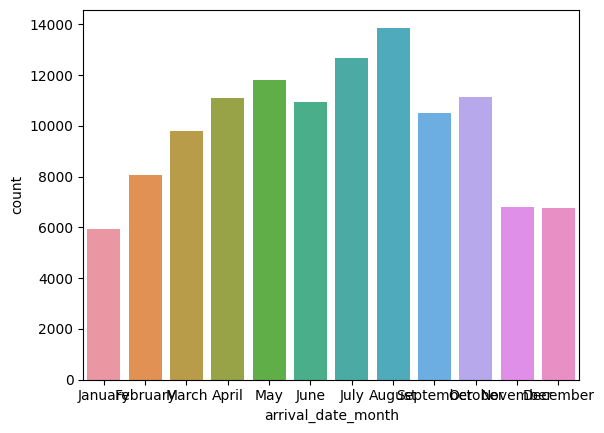

In [69]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
seaborn.countplot(x=data['arrival_date_month'], order = month_sorted)


<Axes: xlabel='arrival_date_month', ylabel='count'>

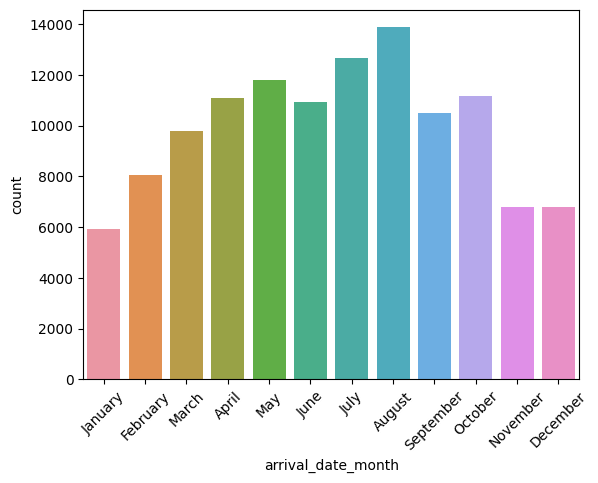

In [70]:
plt.xticks(rotation=45)
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
seaborn.countplot(x=data['arrival_date_month'], order=month_sorted)


<Axes: xlabel='arrival_date_month', ylabel='count'>

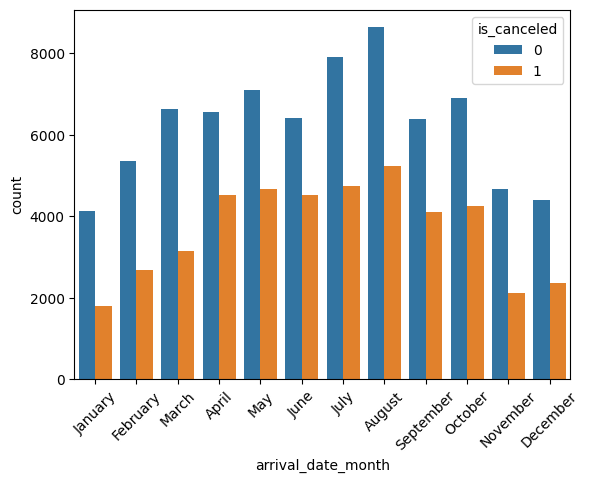

In [76]:
plt.xticks(rotation=45)
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
seaborn.countplot(data=data, x='arrival_date_month', hue="is_canceled", order=month_sorted)
